In [1]:
# Generate non-affine data transformations
import numpy as np
from scipy.misc import imread
from skimage import data, segmentation, color
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from glob import glob
import os
import sys
import pandas as pd
import site

In [22]:
LOCALIZER_DATA_DIR = '/a/data/fisheries_monitoring/data/localizers/'
BOX_FILE = LOCALIZER_DATA_DIR + 'original/boxes.csv'
CROPPED_IMG_DIR = '/a/data/fisheries_monitoring/data/classifiers/cropped_from_origin/'
boxes = pd.read_csv(BOX_FILE, names = ["img", "x","y","width","height"])
reload(site)
import pblend

In [21]:
result = boxes.loc[boxes.img.str.contains('^LAG'),]
#print result
print result.iloc[5,0].split('/')[1]
print np.random.randint(-300,45,1).shape

img_00784.jpg
(1,)


In [ ]:
#class_num_splice = {'LAG': 100, 'SHARK', 100}
offset_noise = 250
class_num_splice = {'LAG': 50}
nof = glob(LOCALIZER_DATA_DIR + 'original/NoF/*.jpg')
num_nof = len(nof)
for k, v in class_num_splice.iteritems() : # foreach class
    print 'Splicing ' + k + ' class for ' + str(v) + ' extra images'
    boxes_mask = boxes.img.str.contains('^' + k)
    class_boxes = boxes.loc[boxes_mask,]
    for i in range(0,v) : # for the number of spliced image in each class
        idx = np.random.randint(0, class_boxes.shape[0], 1)[0]
        f_orig_img = LOCALIZER_DATA_DIR + 'original/' + class_boxes.iloc[idx,0]
        orig_img = cv2.imread(f_orig_img)
        
        # Perform a grabcut of the fish
        #print '    Grabcut'
        gc_tmp = orig_img.copy()
        gc_mask = np.zeros(orig_img.shape[:2], dtype = np.uint8)
        bgd_model = np.zeros((1,65),np.float64)
        fgd_model = np.zeros((1,65),np.float64)
        x, y, w, h = class_boxes.iloc[idx,1], class_boxes.iloc[idx,2], class_boxes.iloc[idx,3], class_boxes.iloc[idx,4]
        rect = (int(x),int(y),int(w),int(h))
        cv2.grabCut(gc_tmp, gc_mask, rect, bgd_model, fgd_model, 1, cv2.GC_INIT_WITH_RECT)
        gc_mask_2 = np.where((gc_mask==1) + (gc_mask==3),255,0).astype('uint8')
        gc_result = cv2.bitwise_and(orig_img, orig_img, mask=gc_mask_2)
        
        # Perform a Poisson blend with a random NoF image
        #print '    Blend'
        nof_img = np.array(imread(nof[np.random.randint(0, num_nof, 1)[0]]))
        H, W, _ = nof_img.shape
        #offset = (np.random.randint(-y, H-h, 1)[0],np.random.randint(-x, W-w, 1)[0])
        offset = (np.random.randint(-offset_noise, offset_noise, 1)[0],np.random.randint(-offset_noise, offset_noise, 1)[0])
        blended_img = pblend.blend(nof_img, gc_result, gc_mask == 3, offset=offset)
        
        # Save
        print '  ' + LOCALIZER_DATA_DIR + 'splice/' + k + '/' + class_boxes.iloc[idx,0].split('/')[1]
        output = Image.fromarray(blended_img)
        output.save(LOCALIZER_DATA_DIR + 'splice/' + k + '/' + class_boxes.iloc[idx,0].split('/')[1])
        #out_box.write(box_file_write)
#out_box.close()
#out_superbox.close()

Splicing LAG class for 50 extra images
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_02236.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_01457.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_02415.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_01221.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_06224.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_04435.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_01952.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_07010.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_07087.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_04414.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_06713.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_01221.jpg
  /a/data/fisheries_monitoring/data/localizers/splice/LAG/img_03232.jpg
  /a/data/fisheries_monit

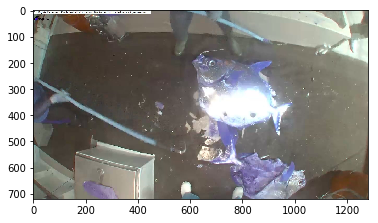

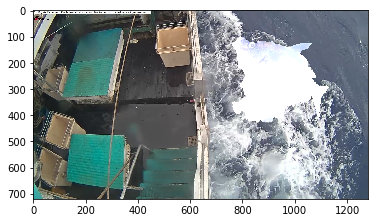

/a/data/fisheries_monitoring/data/localizers/splice/LAG/img_06224.jpg
(595, 165, 387, 330)
1280 720
(720, 1280, 3)
(-70, 153)


In [47]:
plt.imshow(orig_img)
plt.show()
plt.imshow(output)
plt.show()
print LOCALIZER_DATA_DIR + 'splice/' + k + '/' + class_boxes.iloc[idx,0].split('/')[1]
print rect
print W,H
print orig_img.shape
print offset

In [ ]:
# Add 90deg rotate augmentation
over_write = False
aug_name = 'splice'
params = [(1,),(2,),(3,)]
dir_name = LOCALIZER_DATA_DIR + aug_name
pd.read_csv(BOX_FILE,names = ["img", "x","y","width","height"])
in_boxes = pd.read_csv(BOX_FILE+'boxes.csv',names = ["img", "x","y","width","height"])
in_superboxes = pd.read_csv(BOX_FILE+'superboxes.csv',names = ["img", "x","y","width","height"])

no_fish_dir = LOCALIZER_DATA_DIR + 'original/NoF/'
nof = glob(no_fish_dir + '*.jpg')
num_nof = len(nof)

out_box = open(dir_name + '/boxes.csv','w')
out_superbox = open(dir_name + '/superboxes.csv','w')

for class_i in CLASSES : # for each class
    print '  Class ' + class_i + ' for ' + param_name
    if not os.path.exists(dir_name + '/' + class_i) :
        print dir_name + '/' + class_i + ' does not exist'
        os.mkdir(dir_name + '/' + class_i)
    os.chdir(LOCALIZER_DATA_DIR + 'original/' + class_i)
    images = glob('*.jpg')
    for ff_img in images :
            f_img = ff_img.split('.')[0]
            fname = dir_name + '/' + class_i + '/' + f_img + param_name + '.jpg'
            
            img = np.array(imread(ff_img))
            h,w,_ = img.shape
            if not os.path.exists(fname) or over_write : # Rotate and save the images
                aug_img = Image.fromarray(np.rot90(img, param[0]))
                aug_img.save(fname)
            
            # Write the box file stuff
            box_file_header = class_i + '/' + f_img + param_name + '.jpg,'
            super_boxes = in_superboxes[in_superboxes["img"] == (class_i + '/' + ff_img)]
            boxes = in_boxes[in_boxes["img"] == (class_i + '/' + ff_img)]
            for i in xrange(len(boxes)) :
                box = boxes.iloc[i,]
                x, y, bb_w, bb_h = box[1], box[2], box[3], box[4]
                if param[0] == 1 : #90 deg rotation
                    box_file_write = box_file_header + str(y) + ',' + str(w-x-bb_w) + ',' + str(bb_h) + ',' + str(bb_w) + '\n'
                    out_box.write(box_file_write)
                elif param[0] == 2 : #180 deg rotation
                    box_file_write = box_file_header + str(w-x-bb_w) + ',' + str(h-y-bb_h) + ',' + str(bb_w) + ',' + str(bb_h) + '\n'
                    out_box.write(box_file_write)
                elif param[0] == 3 : #270deg rotation
                    box_file_write = box_file_header + str(h-y-bb_h) + ',' + str(x) + ',' + str(bb_h) + ',' + str(bb_w) + '\n'
                    out_box.write(box_file_write)
            for i in xrange(len(super_boxes)) :
                box = super_boxes.iloc[i,]
                x, y, bb_w, bb_h = box[1], box[2], box[3], box[4]
                if param[0] == 1 : #90 deg rotation
                    box_file_write = box_file_header + str(y) + ',' + str(w-x-bb_w) + ',' + str(bb_h) + ',' + str(bb_w) + '\n'
                    out_superbox.write(box_file_write)
                elif param[0] == 2 : #180 deg rotation
                    box_file_write = box_file_header + str(w-x-bb_w) + ',' + str(h-y-bb_h) + ',' + str(bb_w) + ',' + str(bb_h) + '\n'
                    out_superbox.write(box_file_write)
                elif param[0] == 3 : #270deg rotation
                    box_file_write = box_file_header + str(h-y-bb_h) + ',' + str(x) + ',' + str(bb_h) + ',' + str(bb_w) + '\n'
                    out_superbox.write(box_file_write)
out_box.close()
out_superbox.close()

LAG/img_04352.jpg


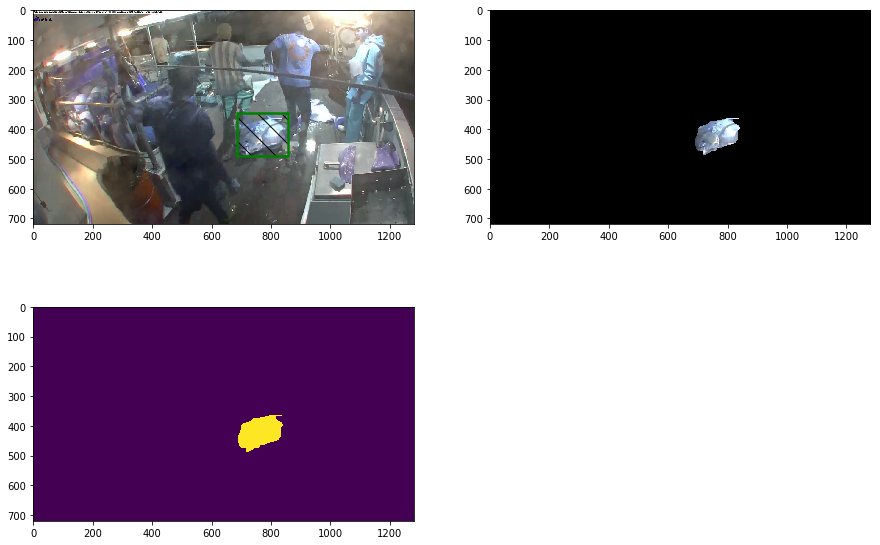

In [16]:
#f_img = 'LAG/img_07919.jpg'
f_img = 'LAG/img_04352.jpg'
os.chdir(LOCALIZER_DATA_DIR + 'original')
img_dir = glob('LAG/*.jpg')
rand_img = np.random.randint(0,len(img_dir),1)[0]
#f_img = img_dir[rand_img]
print f_img
box = boxes[boxes['img'] == f_img]
box = box.iloc[0] 
x, y, w, h = box[1], box[2], box[3], box[4]
img = cv2.imread(f_img)
img2 = img.copy() # original image
mask = np.zeros(img.shape[:2],dtype = np.uint8)
rect = (int(x),int(y),int(w),int(h))
bgdmodel = np.zeros((1,65),np.float64)
fgdmodel = np.zeros((1,65),np.float64)
cv2.grabCut(img, mask, rect, bgdmodel, fgdmodel, 3, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==1) + (mask==3),255,0).astype('uint8')
output = cv2.bitwise_and(img2,img2,mask=mask2)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2,2,1)
ax.imshow(img2)
ax.add_patch(patches.Rectangle((x, y), w, h,hatch='\\',fill=False, color='g',linewidth=2.5))
ax = fig.add_subplot(2,2,2)
ax.imshow(output)
ax = fig.add_subplot(2,2,3)
ax.imshow(mask == 3)
plt.axis('off')
plt.show()

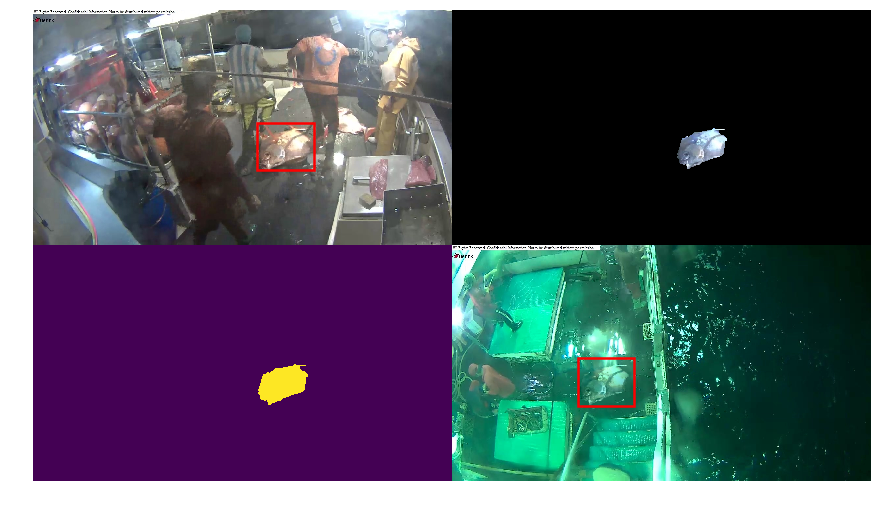

In [52]:
import pblend
img_source = np.array(imread(LOCALIZER_DATA_DIR + 'original/LAG/img_04352.jpg'))
img_target = np.array(imread(LOCALIZER_DATA_DIR + 'original/NoF/img_02381.jpg'))
img_target_orig = img_target.copy()
img_mask = mask == 3
#img_result = pblend.blend(img_target, img_source, img_mask, offset=(0,-300))
fig = plt.figure(figsize=(15, 8.66))
ax = fig.add_subplot(2,2,1)
ax.imshow(img_source)
ax.add_patch(patches.Rectangle((x, y), w, h,fill=False, color='r',linewidth=2.5))
ax.set_aspect('equal')
plt.axis('off')
ax = fig.add_subplot(2,2,2)
#ax.imshow(img_target_orig)
ax.imshow(output)
ax.set_aspect('equal')
plt.axis('off')
ax = fig.add_subplot(2,2,3)
ax.imshow(img_mask)
ax.set_aspect('equal')
plt.axis('off')
ax = fig.add_subplot(2,2,4)
ax.imshow(img_result)
ax.add_patch(patches.Rectangle((x-300, y), w, h,fill=False, color='r',linewidth=2.5))
ax.set_aspect('equal')
plt.axis('off')
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()
fig.savefig('/a/data/fisheries_monitoring/figures/poisson_blend_ex.eps', format='eps')